(1020, 1272)


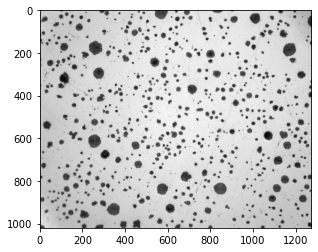

In [3]:
"""
Regionprops
"""

from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2gray
import numpy as np

image = img_as_ubyte(rgb2gray(io.imread("images/cast_iron.jpg")))

plt.imshow(image, cmap="gray")
print(image.shape)

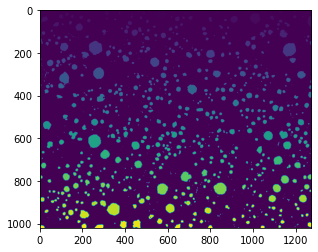

In [8]:
from skimage.filters import threshold_multiotsu

thresholds = threshold_multiotsu(image, 2)
label_image = measure.label(image < thresholds, connectivity=image.ndim)

plt.imshow(label_image)

<ipython-input-10-3c80065b3f3f>:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  image_label_overlay = label2rgb(label_image, image=image)


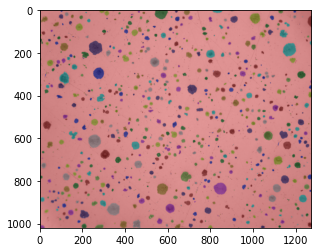

In [10]:
image_label_overlay = label2rgb(label_image, image=image)
plt.imshow(image_label_overlay)

In [11]:
props = measure.regionprops_table(label_image, image,
                                 properties=['label', 'area', 'equivalent_diameter', 'mean_intensity', 'solidity'])

import pandas as pd
df = pd.DataFrame(props)
print(df.head())

   label  area  equivalent_diameter  mean_intensity  solidity
0      1    81            10.155413       95.777778  0.941860
1      2   282            18.948708       85.581560  0.959184
2      3     6             2.763953      116.000000  1.000000
3      4  2065            51.276112       91.754479  0.975898
4      5   130            12.865502       93.284615  0.935252
